# LOAD LIBRARIES

In [1]:
#wrangling
import pandas as pd
import numpy as np

#plot in ggplot
import plotnine as p9

from plotnine import *
from plotnine import data
from pandas import DataFrame

#plot in plotly
#import kaleido
#import plotly.express as px
#import matplotlib.pyplot as plt

#read file directory
import os

#from Functions.py
from Functions import reorder



# LOAD FILES

In [2]:
#WRANGLED DATA
fileName = "Data/20230525FirstExtraction_DataExtraction.xlsx"

df = pd.read_excel(fileName, sheet_name = "Discrepencies",
                   keep_default_na=False, na_values=['_']) #read new file, keep N/A as NA rather than null

#keep columns needed

list(df)


df = df[["College",
         "Subspecialty",
         "REMOVE",
         "FileName",
         #"SubmissionType_RACHEL",
         #"SubmissionType_CAITLYN",
         "SubmissionType_RESOLVE",
        #"ClearQuestion_RACHEL",
         #"ClearQuestion_CAITLYN",
         "ClearQuestion_RESOLVE",
        # "QuestionType_RACHEL",
         #"QuestionType_CAITLYN",
         "QuestionType_RESOLVE",
         #"StudyDesign_RACHEL",
         #"StudyDesign_CAITLYN",
         "StudyDesign_RESOLVE",
         #"AuditQI_RACHEL",
         #"AuditQI_CAITLYN",
         "AuditQI_RESOLVED",
         #"StudyRationale_RACHEL",
         #"StudyRationale_CAITLYN",
         "StudyRationale_RESOLVED",
         #"SystematicReview_RACHEL",
         #"SystematicReview_CAITLYN",
         "SystematicReview_RESOLVED",
         #"SampleSize_RACHEL",
         #"SampleSize_CAITLYN",
         "SampleSize_RESOLVED",
         "Complete",
         #"FLAG",
         #Notes",
         "Did the method stated match what was described?",
         "For noting in paper "
         ]]

df = df[~(df["College"] == 0)] #get rid of null rows

df = df[(df["REMOVE"] == 0)] #remove those flagged for removal



#Create DF of articles and numbers (to anonomyse articles)

df_articleNumber = df[["FileName"]]

df_articleNumber.rename(columns={"FileName": "Article"}, inplace=True)

df_articleNumber["ArticleNum"] = "Article " + df_articleNumber.index.astype(str)

#df_articleNumber.head()

C:\Users\s2997324\AppData\Local\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\482734333.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\482734333.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
#COLLEGE  NAMES

fileName = "Data/CollegeNames.csv"

df_college_names = pd.read_csv(fileName) #read new file


df_college_names.columns = ["Q3_1", "Full", "Q3_2"]

#make a dictionary of college names to be able to put full names into tables

#dict_collegesNames = df_college_names[["Q3_1", "Full"]].drop_duplicates().set_index("Q3_1").to_dict()

dict_collegesNames =pd.Series(df_college_names.Full.values,index=df_college_names.Q3_1).to_dict()

# DEMOGRAPHIC TABLE FOR UPLOADED STUDIES

In [4]:
df2 = df[["College",
         "SubmissionType_RESOLVE",
         "ClearQuestion_RESOLVE",
         "QuestionType_RESOLVE",
         "StudyDesign_RESOLVE",
         "AuditQI_RESOLVED",
         "StudyRationale_RESOLVED",
         "SystematicReview_RESOLVED",
         "SampleSize_RESOLVED",
         "Did the method stated match what was described?"
         ]]




#rename columns
df2.rename(columns={"SubmissionType_RESOLVE": "What type of submission was provided?",
                   "ClearQuestion_RESOLVE": "Was there a clear, well-structured and answerable research question? (e.g. PICO-T).",
                   "QuestionType_RESOLVE":"What type of question did the researchers ask?",
                   "StudyDesign_RESOLVE":"What study design did the researchers use?",
                   "AuditQI_RESOLVED":"Was this an Audit or QI project?",
                   "StudyRationale_RESOLVED":"Did the authors provide a sound argument for the rationale to do the study and/or that the results of the study provide meaningful information?",
                   "SystematicReview_RESOLVED":"Was there an adequate consideration of the published literature on the topic, including previous systematic reviews?",
                   "SampleSize_RESOLVED":"Was there a sample size calculation or was the power of the study to provide a meaningful result discussed?",
                   }, inplace=True)



C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\804706199.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
colNames = [
 #BROAD INFO   
 'College',
 'What type of submission was provided?',
 'Was this an Audit or QI project?',
 
 #RESEARCH QUESTION
 'Did the authors provide a sound argument for the rationale to do the study and/or that the results of the study provide meaningful information?',
 'Was there an adequate consideration of the published literature on the topic, including previous systematic reviews?',
 'Was there a clear, well-structured and answerable research question? (e.g. PICO-T).',
 'What type of question did the researchers ask?',

#METHODS
 'What study design did the researchers use?',
 'Did the method stated match what was described?'
 'Was there a sample size calculation or was the power of the study to provide a meaningful result discussed?',
 ]

In [6]:
#create empty df

colNames0= "Question"
colNames1 = "Number of articles"
colNames2 = "Category"

total = len(df2)


dfArtDemographic= pd.DataFrame(columns=[colNames0, colNames2, colNames1])

#colNames = list(df2)

#order of questions in table
colNames = [
 #BROAD INFO   
 'College',
 'What type of submission was provided?',
 'Was this an Audit or QI project?',
 
 #RESEARCH QUESTION
 'Did the authors provide a sound argument for the rationale to do the study and/or that the results of the study provide meaningful information?',
 'Was there an adequate consideration of the published literature on the topic, including previous systematic reviews?',
 'Was there a clear, well-structured and answerable research question? (e.g. PICO-T).',
 'What type of question did the researchers ask?',

#METHODS
 'What study design did the researchers use?',
 'Did the method stated match what was described?',
 'Was there a sample size calculation or was the power of the study to provide a meaningful result discussed?',
 ]



for thing in colNames:
    
    n = df2[thing].value_counts()
     

    #make series counts into df
    df1 = n.to_frame()

    #reset index
    df1=df1.reset_index()

    #add a new question column
    col = "" * (len(df1)-1)
    df1.insert(loc = 0, column="Question", value = col)


    #create new row to question

    newRow = pd.DataFrame([[thing, "", ""]],
    columns = list(df1))

    df1 = pd.concat([newRow, df1[:]]).reset_index(drop = True)

    df1.rename(columns={thing: colNames1, "index": colNames2}, inplace=True) #rename column

    df1[colNames1] = df1[colNames1].replace(r'^\s*$', 0, regex=True) #replace nan with 0
    df1[colNames1] = df1[colNames1].astype(int)

    df1["Temp"] = round(df1[colNames1]/total * 100).astype(int) #find the % and round to nearest int due to small sample size

    df1[colNames1] = df1[colNames1].astype(str) #convert columns to string
    df1["Temp"] = df1["Temp"].astype(str)

    df1[colNames1] = df1[colNames1] + " (" + df1["Temp"] + "%)" #make nice formatting

    df1 = df1[[colNames0, colNames2, colNames1]] #remive temp column

    #replace weird first value
    df1.iloc[0,2] = ""

    dfArtDemographic = dfArtDemographic.append(df1)
    

#replace with full college name
dfArtDemographic = dfArtDemographic.replace({"Category": dict_collegesNames})

#save output table
dfArtDemographic.to_csv("Results/UploadedArticle/UploadedArticle Demographic Info.csv", index = False)    
    
#dfArtDemographic.head()

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\244548718.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\244548718.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\244548718.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\244548718.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\244548718.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

# DID THE STUDY DESIGN MATCH THE QUESTION?

In [7]:
"""
Here we are interested in whether the study design used was the best way to answer the research question 

First we will remove study designs that are not in NHMRC's heirachy of evidence - specifically audits, 
in vitro, narrative review, animal studies, practice guidelines and mathematical modeling studies 

"""

#get data

df_QuestionStudy = df[df["AuditQI_RESOLVED"] == "No"]



df_QuestionStudy = df_QuestionStudy[[ "QuestionType_RESOLVE",
                                     "StudyDesign_RESOLVE"]]



#count the number in each Question-Design combination
df_QuestionStudyGroup = df_QuestionStudy.groupby(['QuestionType_RESOLVE', 'StudyDesign_RESOLVE']).size().to_frame().reset_index()

#rename columns
df_QuestionStudyGroup.rename(columns={"QuestionType_RESOLVE": "QuestionType", 
                                      "StudyDesign_RESOLVE": "StudyDesign", 
                                      0: "Number of Articles" }, inplace=True)



# add "evidence level" to table

#study designs to keep
designs = ["Cross sectional",
           "Case series",
           "Review - Systematic Review",
           "Cohort WITH control",
           "Randomised Control Trial - Cross Over",
           "Cohort withOUT control", 
           "Case control",
           "Qualiative - Descriptive"] 



df_QuestionStudyGroup1 = df_QuestionStudyGroup[df_QuestionStudyGroup["StudyDesign"].isin(designs)]


#!!!!!!!!!!! OVERLAY ANNOTATIONS OF EVIDENCE LEVEL

df_QuestionStudyGroup1["Evidence level"]="**"


#Create evidence levels
#https://www.canceraustralia.gov.au/resources/clinical-practice-guidelines/first-line-chemotherapy-treatment-women-epithelial-ovarian-cancer/appendix-1-nhmrc-evidence-hierarchy


#intervention studies:
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Intervention" ) & (df_QuestionStudyGroup1.StudyDesign =="Review - Systematic Review" ), "Evidence level"] = "I"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Intervention" ) & (df_QuestionStudyGroup1.StudyDesign.str.match(r'^Randomised') ), "Evidence level"] = "II"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Intervention" ) & ((df_QuestionStudyGroup1.StudyDesign =="Cohort WITH control") | (df_QuestionStudyGroup1.StudyDesign =="Case control")), "Evidence level"] = "III-2"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Intervention" ) & (df_QuestionStudyGroup1.StudyDesign =="Cohort withOUT control"), "Evidence level"] = "III-3"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Intervention" ) & (df_QuestionStudyGroup1.StudyDesign =="Case series"), "Evidence level"] = "IV"
    
#diagnostic test accuracy    
    
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Diagnostic test accuracy" ) & (df_QuestionStudyGroup1.StudyDesign =="Review - Systematic Review" ), "Evidence level"] = "I" 
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Diagnostic test accuracy" ) & (df_QuestionStudyGroup1.StudyDesign =="Cross sectional" ), "Evidence level"] =  "II or III-1/2"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Diagnostic test accuracy" ) & (df_QuestionStudyGroup1.StudyDesign =="Case control" ), "Evidence level"] =  "III-3"


#Phenomenology 
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Phenomenology" ) & (df_QuestionStudyGroup1.StudyDesign =="Qualiative - Descriptive" ), "Evidence level"] = "II"

#Prevalence
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Prevalence" ) & (df_QuestionStudyGroup1.StudyDesign =="Review - Systematic Review" ), "Evidence level"] = "I"
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Prevalence" ) & (df_QuestionStudyGroup1.StudyDesign =="Cross sectional" ), "Evidence level"] = "II"     

#Rate    
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Rate" ) & (df_QuestionStudyGroup1.StudyDesign =="Review - Systematic Review" ), "Evidence level"] = "I"       

#Risk
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Risk" ) & (df_QuestionStudyGroup1.StudyDesign =="Cohort WITH control" ), "Evidence level"] = "II" 
df_QuestionStudyGroup1.loc[(df_QuestionStudyGroup1.QuestionType =="Risk" ) & (df_QuestionStudyGroup1.StudyDesign =="Cross sectional" ), "Evidence level"] = "IV"     

#Prognosis

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\1885813983.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


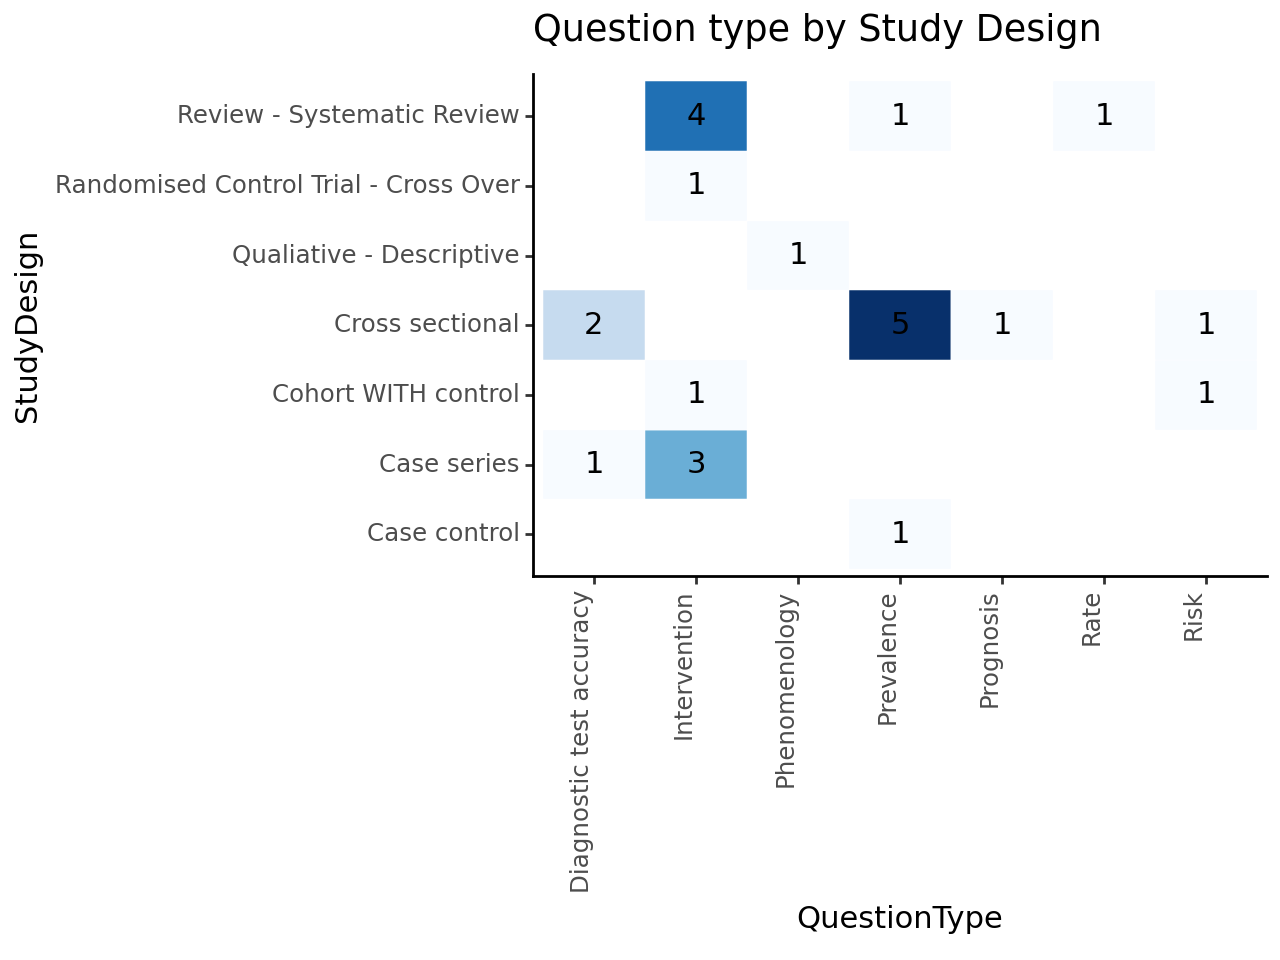

In [8]:
# Create Heatmap of Question Type by Study Design

#create heatmap


#https://stackoverflow.com/questions/64410412/hourly-heatmap-graph-using-python-s-ggplot2-implementation-plotnine
#https://t-redactyl.io/blog/2020/09/making-beautiful-boxplots-using-plotnine-in-python.html
#colours https://matplotlib.org/2.0.2/users/colormaps.html

heatmap = (p9.ggplot(df_QuestionStudyGroup1,
                     p9.aes(x="QuestionType",
                            y="StudyDesign",
                            fill="Number of Articles"))
           
           
           
     + p9.geom_tile(color='white',size=.1)
     
     #heading    
     + p9.labs(title='Question type by Study Design') 
     
     + p9.theme_classic() #blank background and gridlines
     
     #fill colour
     + p9.scale_fill_cmap('Blues') 
     
     #add annotations
     + p9.geom_text(p9.aes(label = "Number of Articles"))     
     
    
     + p9.theme(legend_position = 'none', #remove the legend
                panel_grid_major= p9.element_blank(),
                panel_border=p9.element_blank(),
                panel_background=p9.element_blank(),                
                axis_text_x= p9.element_text(rotation=90, hjust=1) #rotate x axis labels
                          
                )    
     
     
     )


print(heatmap)


#p9.ggsave(heatmap,'Results/UploadedArticle/Visuals/QuestionType by Study Design.png', dpi=300)


# Reporting Guidelines

In [9]:
# %% REPORTING GUIDELINES - QUALITY OF REPORTING

#get a list of files in the reporting directory

reportingFiles = os.listdir("Data/ReportingTools/")


#create empty df to add reporting results
df_reportinQual = pd.DataFrame()




In [10]:
"""
Loop through all the files in the resolved folder for reporting quality.
Extract the headings underwhich they were reported (e.g. intro, methods etc)
For each study work out how many items in each section was reported on

"""

for file in reportingFiles:
     
    
    #REPORTING DATA
    fileName = "Data/ReportingTools/" + file
    
    #fileName = "Data/ReportingTools/" + reportingFiles[10]
    
    df_Reporting = pd.read_excel(fileName, sheet_name = "Reviewer Assessment",
                       keep_default_na=False, na_values=[''], header=None) #read new file, keep N/A as NA rather than null
    
    #replace any 0 with NAN
    df_Reporting.replace(0, np.nan, inplace=True)
    
    
    #Find the row number with "FILE NAME" and make this the header
    row_num = df_Reporting[df_Reporting[0] == 'FILE NAME'].index[0] 
    
    
    
    #GET THE QUESTION NUMBERS AND SECTIONS
    if file == 'AGREE checklist_RESOLVED.xlsx':
        section = "Domain"
    else:
        section = "Section"




    #get the questions needed    
    needed_Groups =  df_Reporting.iloc[:(row_num+1)].reset_index(drop=True)
    
    #remove columns up until "Section"
    col = needed_Groups.columns[needed_Groups.eq(section).any()][0]
    
    needed_Groups = needed_Groups.iloc[:,col:] 
    
    #keep the row with section and resercer notes
    needed_Groups = needed_Groups.loc[needed_Groups[col].isin([section,"Researcher Notes"])]
    
    needed_Groups= needed_Groups.ffill(axis = 1)
    
    #transpose df
    needed_Groups = needed_Groups.transpose().iloc[1:].reset_index(drop=True)
    
    needed_Groups[0] = needed_Groups[0].str.split(':',expand=True)[0]
    
    #rename columns
    needed_Groups.columns = ["Group", "Question"]
    
    
        
    #get unique sections
    headings = needed_Groups.Group.unique()
    
    
     
    #GET THE QUALITY REPORTING DATA
    df_Reporting=df_Reporting.iloc[row_num:].reset_index(drop=True)
    
    df_Reporting.columns = df_Reporting.iloc[0] #make first row header
    
    #drop the first row
    df_Reporting=df_Reporting.iloc[1:].reset_index(drop=True)
    
    df_Reporting = df_Reporting.dropna() #drop rows with nulls (werent assessed with this tool)
    
    
    
    
    #get name of tool being looked at
    # https://www.geeksforgeeks.org/python-extract-string-between-two-substrings/
    sub1 = "Data/ReportingTools/"
    sub2 = " checklist_RESOLVED.xlsx"
    
    # getting index of substrings
    idx1 = fileName.index(sub1)
    idx2 = fileName.index(sub2)
     
    tool = fileName[idx1 + len(sub1): idx2]
         
    
    #create empty df to add reporting results
    df_reportinQual1 = pd.DataFrame()
    
    
    #for each section (e.g. abstract, methods etc)
    for h in headings:
          
        
        #get a list of the questions relevant to the section
        questions = ["FILE NAME"]
        questions = questions + needed_Groups[needed_Groups.Group == h]["Question"].tolist()
        
       
        #get the columns with the questions
        m = df_Reporting[questions]
    
        #get unique list of responses (Y, N, NA, Unsure)    
        responses = pd.unique(m[needed_Groups[needed_Groups.Group == h]["Question"].tolist()].values.ravel('K')).tolist()
        
        #remove NA
        while "NA" in responses: responses.remove("NA")  
        
        #get the number of times the response occured
        counts = m.apply(pd.Series.value_counts, axis=1)[responses].fillna(0)
            
        #add the file names
        counts.insert(0, "FILE NAME", m["FILE NAME"])
        
        #change from wide to long
        counts_long = pd.melt(counts,id_vars="FILE NAME",value_vars= responses)
        
        #add column with the section type
        counts.insert(1, "section", h) 
       
        #append to empty df
    
        df_reportinQual1 = df_reportinQual1.append(counts)
    
    
    #fill nan with 0
    df_reportinQual1 = df_reportinQual1.fillna(0)
    
    #add column showing reporing tool name
    df_reportinQual1.insert(0, "Reporting tool", tool)
    
    #append to the big df
    df_reportinQual = df_reportinQual.append(df_reportinQual1)

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\2543208281.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\2543208281.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\2543208281.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\2543208281.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\2543208281.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [11]:
#find % reported for each section of each paper
    
df_reportinQual["Total"] = df_reportinQual["Y"] + df_reportinQual["N"] + df_reportinQual["Unclear/Partial"]

df_reportinQual["%Y"] = round(df_reportinQual["Y"]/df_reportinQual["Total"] * 100, 1)

df_reportinQual["%N"] = round(df_reportinQual["N"]/df_reportinQual["Total"] * 100, 1)

df_reportinQual["%Unclear/Partial"] = round(df_reportinQual["Unclear/Partial"]/df_reportinQual["Total"] * 100, 1)

In [12]:
df_reportinQual_sns = df_reportinQual[["Reporting tool","section",
           "FILE NAME",
           "%Y",
           "%N",
           "%Unclear/Partial"
          ]]

df_reportinQual_sns["Total"] = 100

#df_reportinQual_sns

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\769860828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#WRANGLE THE DATA

#get a list of files in the reporting directory
reportingFiles = os.listdir("Data/ReportingTools/")


#create empty df to add reporting results
df_reportinQual = pd.DataFrame()




for file in reportingFiles:
     
    
    #REPORTING DATA
    fileName = "Data/ReportingTools/" + file
    
   # fileName = "Data/ReportingTools/" + reportingFiles[10]
    
    df_Reporting = pd.read_excel(fileName, sheet_name = "Reviewer Assessment",
                       keep_default_na=False, na_values=[''], header=None) #read new file, keep N/A as NA rather than null
    
    #replace any 0 with NAN
    df_Reporting.replace(0, np.nan, inplace=True)
    
    
    #Find the row number with "FILE NAME" and make this the header
    row_num = df_Reporting[df_Reporting[0] == 'FILE NAME'].index[0] 
    
    
    
    #GET THE QUESTION NUMBERS AND SECTIONS
    if file == 'AGREE checklist_RESOLVED.xlsx':
        section = "Domain"
    else:
        section = "Section"



    #get the questions needed    
    needed_Groups =  df_Reporting.iloc[:(row_num+1)].reset_index(drop=True)
    
    #remove columns up until "Section"
    col = needed_Groups.columns[needed_Groups.eq(section).any()][0]
    
    needed_Groups = needed_Groups.iloc[:,col:] 
    
    #keep the row with section and resercer notes
    needed_Groups = needed_Groups.loc[needed_Groups[col].isin([section,"Researcher Notes"])]
    
    needed_Groups= needed_Groups.ffill(axis = 1)
    
    #transpose df
    needed_Groups = needed_Groups.transpose().iloc[1:].reset_index(drop=True)
    
    needed_Groups[0] = needed_Groups[0].str.split(':',expand=True)[0]
    
    #rename columns
    needed_Groups.columns = ["Group", "Question"]
    
    
        
    #get unique sections
    headings = needed_Groups.Group.unique()
    
    
     
    #GET THE QUALITY REPORTING DATA
    df_Reporting=df_Reporting.iloc[row_num:].reset_index(drop=True)
    
    df_Reporting.columns = df_Reporting.iloc[0] #make first row header
    
    #drop the first row
    df_Reporting=df_Reporting.iloc[1:].reset_index(drop=True)
    
    df_Reporting = df_Reporting.dropna() #drop rows with nulls (werent assessed with this tool)
    
    
    
    
    #get name of tool being looked at
    # https://www.geeksforgeeks.org/python-extract-string-between-two-substrings/
    sub1 = "Data/ReportingTools/"
    sub2 = " checklist_RESOLVED.xlsx"
    
    # getting index of substrings
    idx1 = fileName.index(sub1)
    idx2 = fileName.index(sub2)
     
    tool = fileName[idx1 + len(sub1): idx2]
         
    
    #create empty df to add reporting results
    df_reportinQual1 = pd.DataFrame()
    
    #change reporting from wide to long
    
    #columns to keep
    col = ["FILE NAME"]
    col1 = needed_Groups["Question"].tolist()
    
    
    df_reportinQual1 = df_Reporting[col + col1]

    df_reportinQual1 = pd.melt(df_reportinQual1,
                                id_vars=col,
                                value_vars= col1)
    
    #replace question number with section
    df_reportinQual1 = df_reportinQual1.replace(needed_Groups.set_index('Question')['Group'])

    
    #add column showing reporing tool name
    df_reportinQual1.insert(0, "Reporting tool", tool)
    

    #rename columns
    df_reportinQual1.columns = ["Reporting tool", "Article", "Section", "Score"]
    
    #remove NA
    df_reportinQual1 = df_reportinQual1.loc[df_reportinQual1["Score"] != "NA"]
    
    #append to the big df
    df_reportinQual = df_reportinQual.append(df_reportinQual1)
    


#Harmonise data

#Change sections to Sentence case
df_reportinQual["Section"] = df_reportinQual["Section"].str.title()

#replace "randomisation" with "methods"
df_reportinQual["Section"]= df_reportinQual["Section"].replace('Randomisation','Methods')

#replace "Title Or Abstract" with "Title" 
df_reportinQual["Section"]= df_reportinQual["Section"].replace("Title Or Abstract",'Title')


#replace "Title Or Abstract" with "Title" 
df_reportinQual["Section"]= df_reportinQual["Section"].replace('Other Information','Other')







#replace question number with section

df_reportinQual["FileName"]= df_reportinQual["Article"]


df_reportinQual["Article"] = df_reportinQual["Article"].replace(df_articleNumber.set_index('Article')['ArticleNum'])

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3692697993.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3692697993.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3692697993.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3692697993.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3692697993.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [14]:
#replace some weird headings with the correct ones
abstractTerms = ['Abstract (No References)',
       'Abstract Structured Summary Of Study Design, Methods, Results, And Conclusions (For Specific Guidance, See Stard For Abstracts)']

df_reportinQual.loc[df_reportinQual["Section"].isin(abstractTerms), "Section"] = "Abstract"

#df_reportinQual.Section.unique()

In [15]:
df_reportinQual_sns1 = df_reportinQual[['Reporting tool', 'Article', "Section", "Score"]].value_counts().reset_index(name='count')


In [16]:
def makePropLabel (data, col, article):
    sec = data[col].unique()[0]

    df_1 = data[data[col] == sec]


    #add total row
    df_1.loc['total']= df_1.sum()

    #add absolute number col
    df_1["Prop"] = (df_1["count"]/df_1.loc["total"]['count']*100).astype(int).astype(str) + "%"


    df_1 = df_1.drop(["total"])
    
    
    for sec in data[col].unique()[1:]:
        df_2 = data[data[col] == sec]

        #add total row
        df_2.loc['total']= df_2.sum()

        #add absolute number col
        df_2["Prop"] = (df_2["count"]/df_2.loc["total"]['count']*100).astype(int).astype(str) + "%"

        df_2 = df_2.drop(["total"])

        df_1 = pd.concat([df_1, df_2])


    return df_1


In [17]:
art = df_reportinQual_sns1.Article.unique()[0]

data = df_reportinQual_sns1[df_reportinQual_sns1.Article == art]

df_reportinQual_sns1_prop = makePropLabel (data,"Section", art)


for art in df_reportinQual_sns1.Article.unique()[1:]:
    data = df_reportinQual_sns1[df_reportinQual_sns1.Article == art]
    df_2 = makePropLabel (data,"Section", art)
    
    df_reportinQual_sns1_prop = pd.concat([df_reportinQual_sns1_prop,df_2])
    
df_reportinQual_sns1_prop


    

C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3381044967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3381044967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\ipykernel_26684\3381044967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\s2997324\AppData\Local\Temp\i

,Reporting tool,Article,Section,Score,count,Prop
0,STARD,Article 14,Methods,Y,14,87%
273,STARD,Article 14,Methods,N,1,6%
274,STARD,Article 14,Methods,Unclear/Partial,1,6%
39,STARD,Article 14,Results,Y,6,85%
295,STARD,Article 14,Results,Unclear/Partial,1,14%
...,...,...,...,...,...,...
96,PRISMA Scoping,Article 34,Discussion,Y,3,100%
130,PRISMA Scoping,Article 34,Introduction,Y,2,100%
270,PRISMA Scoping,Article 34,Title,N,1,100%
278,PRISMA Scoping,Article 34,Other,N,1,100%


In [18]:
#save file

saveTo = "Results/UploadedArticle/ForPlotting_ReportingQual.csv"

df_reportinQual_sns1_prop.to_csv(saveTo, index=False)

#df_reportinQual_sns1


## Table for manuscript

Create table for manuscript with absolute and % values

### Not AGREE

In [19]:
df_reportinQual_sns1NOTAgree = df_reportinQual_sns1[df_reportinQual_sns1["Reporting tool"] != "AGREE"]

In [20]:
cat_Section = ['Title',
               'Abstract',
               'Introduction', 
               'Methods', 
               'Results', 
               'Discussion',
               'Other'
              ]

cat_Score = df_reportinQual_sns1NOTAgree["Score"].unique()

cat_Article = ['Article 1',
                'Article 2',
                'Article 3',
                'Article 4',  
                'Article 5', 
                'Article 6',
                'Article 7',
                'Article 8', 
                 'Article 11',
                 'Article 12',
                 'Article 13',
                 'Article 14',
                 'Article 15',
                 'Article 16',
                 'Article 18',

                 'Article 20',
                 'Article 22',
                 'Article 24',
                 'Article 25',
                 'Article 26',

                 'Article 33',
                 'Article 34',
                 'Article 35',
                 'Article 36',
                 'Article 37',
                 'Article 38',
                 'Article 39']




In [21]:
#create dummy variables (99999) for those without a section

for article in cat_Article:

    lala = df_reportinQual_sns1NOTAgree[(df_reportinQual_sns1NOTAgree['Article']== article)]

    lala = lala.drop_duplicates('Section')
    lala = reorder(lala, cat_Section, 'Section')
    lala["Reporting tool"] = lala.iloc[0]["Reporting tool"]
    lala["Article"] = lala.iloc[0]["Article"]

    #keep the null value to add to df
    lala = lala[lala['Score'].isnull()]

    #replace nulls with 9999
    lala = lala.fillna(9999)


    df_reportinQual_sns1NOTAgree = pd.concat([df_reportinQual_sns1NOTAgree, lala])

#df_reportinQual_sns1NOTAgree[(df_reportinQual_sns1NOTAgree['Article']== article)]

In [22]:
def getSection (df, article, section):
    df_1 = df[(df['Article']== article) & (df['Section'] == section)]

    df_1 = df_1[['Article', 'Section', 'Score', 'count']]


    df_1 = reorder(df_1, cat_Score, 'Score')

    #if the values are meant to be NA
    if df_1.Article.isnull().all():
        #replace nulls
        df_1["Article"] = article
        df_1["Section"] = section
        df_1['count'] = df_1['count'].fillna("NA")

        #add absolute number col
        df_1["Values"] = "NA"

        df_1["Prop."] = "NA"

    else:
        #replace nulls
        df_1["Article"] = article
        df_1["Section"] = section
        df_1['count'] = df_1['count'].fillna(0)

        #add total row
        df_1.loc['total']= df_1.sum()

        #add absolute number col
        df_1["Values"] = " " + df_1["count"].astype(int).astype(str) + "/" + str(int(df_1.loc["total"]['count']))

        df_1["Prop."] = (df_1["count"]/df_1.loc["total"]['count']*100).astype(int).astype(str) + "%"


        df_1 = df_1.drop(["total"])

    df_1 = df_1.pivot(index= ['Article',"Section"], columns=['Score'], values=['Values', "Prop."])



    #df_1
    
    return df_1
    

In [23]:
art = cat_Article[0]
data = df_reportinQual_sns1NOTAgree

#create an initial df with abstract data
df_1 = getSection (data, art, cat_Section[0])

#append remaining sections
for sec in cat_Section [1:]:
    df_2 = getSection (data, art, sec)
    
    df_1 = pd.concat([df_1, df_2])
    
df_3 = df_1



for art in cat_Article[1:]:
    
    #create an initial df with abstract data
    df_1 = getSection (data, art, cat_Section[0])

    #append remaining sections
    for sec in cat_Section [1:]:
        df_2 = getSection (data, art, sec)

        df_1 = pd.concat([df_1, df_2])
        
    df_3 = pd.concat([df_3, df_1])





df_reportinQual_sns1NOTAgree = df_3

#save file

#df_reportinQual_sns1NOTAgree

###  AGREE

In [24]:
df_reportinQual_sns1Agree = df_reportinQual_sns1[df_reportinQual_sns1["Reporting tool"] == "AGREE"]

In [25]:
cat_Section = ['Domain 1',
               'Domain 2',
               'Domain 3', 
               'Domain 4', 
               'Domain 5', 
               'Domain 6'
              ]

cat_Score = ['N',
             'Unclear/Partial',
             'Y'
            ]

cat_Article = df_reportinQual_sns1Agree['Article'].unique()


In [26]:
data = df_reportinQual_sns1Agree
art = cat_Article[0]

#create an initial df with abstract data
df_1 = getSection (data, art, cat_Section[0])

#append remaining sections
for sec in cat_Section [1:]:
    df_2 = getSection (data, art, sec)
    
    df_1 = pd.concat([df_1, df_2])
    
df_3 = df_1




for art in cat_Article[1:]:
    
    #create an initial df with abstract data
    df_1 = getSection (data, art, cat_Section[0])

    #append remaining sections
    for sec in cat_Section [1:]:
        df_2 = getSection (data, art, sec)

        df_1 = pd.concat([df_1, df_2])
        
    df_3 = pd.concat([df_3, df_1])



df_reportinQual_sns1Agree = df_1



### Merge both tables

In [27]:
df_reportinQual_sns1Overall = pd.concat([df_reportinQual_sns1NOTAgree,df_reportinQual_sns1Agree])

In [28]:
#save file

saveTo = "Results/UploadedArticle/SuppTable_ReportingQual.csv"

df_reportinQual_sns1Overall.to_csv(saveTo)

# Risk of Bias

In [29]:
#READ THE RISK OF BIAS DATA

#get a list of files in the reporting directory

import regex as re

RoBFiles = os.listdir("Data/RoB tools")



## AMSTAR

In [30]:
#get file

tool1 = "AMSTAR"
tool = re.compile(".*"+ tool1 +"*")

fileName = "Data/RoB tools/" + list(filter(tool.match, RoBFiles))[0] # Read Note below


# fileName = "Data/ReportingTools/" + reportingFiles[10]

df_RoB = pd.read_excel(fileName, sheet_name = "RoB Assessment",
                   keep_default_na=False, na_values=[''], header=None) #read new file, keep N/A as NA rather than null

#replace any 0 with NAN
df_RoB.replace(0, np.nan, inplace=True)


#Find the row number with "FILE NAME" and make this the header
row_num = df_RoB[df_RoB[0] == 'File Name'].index[0] 

df_RoB=df_RoB.iloc[row_num:].reset_index(drop=True)

df_RoB.columns = df_RoB.iloc[0] #make first row header

#drop the first row
df_RoB=df_RoB.iloc[1:].reset_index(drop=True)

df_RoB.columns
  
#get needed columns
df_RoB = df_RoB[['File Name', 
                 'Study Type', 
                 'Q1 - PICO Overall Score',
                 'Q2 - Overall Score', 
                 'Q3 - Overall Score', 
                 'Q4 - Overall Score',
                 'Q5 - Overall Score', 
                 'Q6 - Overall Score',
                 'Q7 - Overall Score',
                 'Q8 - Overall Score', 
                 'Q9 - Overall', 
                 'Q10 - Overall', 
                 'Q11a - Overall',
                 'Q11b - Overall2',
                 'Q12 - Overall Score', 
                 'Q13 - Overall Score', 
                 'Q14 - Overall Score', 
                 'Q15 - Overall Score',
                 'Q16 - Overall Score'
    ]]




#rename columns
df_RoB.columns = ['Article', 
                 'Study Type', 
                 'Item 1',
                 'Item 2',
                 'Item 3',
                 'Item 4',
                 'Item 5',
                 'Item 6',
                'Item 7',
                 'Item 8',
                 'Item 9',
                'Item 10',
                 'Item 11a',
                 'Item 11b',
                 'Item 12',
                 'Item 13',
                 'Item 14',
                 'Item 15',
                 'Item 16',
    ]




df_RoB["Article"] = df_RoB["Article"].replace(df_articleNumber.set_index('Article')['ArticleNum'])


#only keep scoping and systematic reviews

df_RoB = df_RoB.dropna(subset = ['Item 1']) #drop rows with nulls (werent assessed with this tool)

#Go from wide to long

questions =[
             'Item 1',
             'Item 2',
             'Item 3',
             'Item 4',
             'Item 5',
             'Item 6',
            'Item 7',
             'Item 8',
             'Item 9',
            'Item 10',
             'Item 11a',
             'Item 11b',
             'Item 12',
             'Item 13',
             'Item 14',
             'Item 15',
             'Item 16',
]


df_RoB_long = pd.melt(df_RoB, id_vars=['Article',
                         'Study Type'], 
        value_vars= questions)

#rename columns
df_RoB_long.columns = ['Article', 
                       'Study Type', 
                       "Item",
                       "Judgement"
                       ]




#fix spelling
#replace "Title Or Abstract" with "Title" 
df_RoB_long["Judgement"]= df_RoB_long["Judgement"].replace('No meta-analysisconducted','No meta-analysis conducted')


#develop annotations for colour blind
df_RoB_long["Text"] = "NA"
df_RoB_long.loc[df_RoB_long['Judgement'] == 'Yes', 'Text'] = "Y"
df_RoB_long.loc[df_RoB_long['Judgement'] == 'No', 'Text'] = "N"
df_RoB_long.loc[df_RoB_long['Judgement'] == 'Partial Yes', 'Text'] = "PY"
df_RoB_long.loc[df_RoB_long['Judgement'] == 'No meta-analysis conducted', 'Text'] = "N-MA"


df_RoB_long['Judgement'].unique()

array(['Yes', 'No', 'Partial Yes', 'NA', 'No meta-analysis conducted'],
      dtype=object)

In [31]:
#create annotations for study types

#create numbers for each category
df_RoB_long["Study Type Code"] = pd.Categorical(df_RoB_long["Study Type"], categories=df_RoB_long["Study Type"].unique()).codes
df_RoB_long["Study Type Code"] = df_RoB_long["Study Type Code"] +1

#create annotations
#numMap = {1:"ONE", 2:"TWO", 3:"THREE", 4:"FOUR", 5:"FIVE", 6:"SIX", 7:"SEVEN"}

#df_RoB_long = df_RoB_long.replace({"Study Type Code": numMap})


df_RoB_long["ArticleAnnotate"] = df_RoB_long["Article"] + " $" + "^{" + df_RoB_long["Study Type Code"].astype(str) + "}$"

#df_RoB_long["ArticleAnnotate"] = (df_RoB_long["ArticleAnnotate"].str.replace(":", "{\u207"))

#df_RoB_long

In [32]:
#sort the article order
df_RoB_long[["X", "Order"]] = df_RoB_long["Article"].str.split(' ', n=1, expand = True) #split on space to get numbers
df_RoB_long = df_RoB_long.drop("X", axis='columns') #drop column X

df_RoB_long["Order"] = df_RoB_long["Order"].astype(int) #make int
df_RoB_long = df_RoB_long.sort_values(by=['Order']) #sort


#article order
articleOrder = list(reversed(df_RoB_long["ArticleAnnotate"].unique()))

#save file

saveTo = "Results/UploadedArticle/ForPlotting_AMSTAR.csv"

df_RoB_long.to_csv(saveTo, index=False)

In [33]:
StudyTypesCodes = df_RoB_long[['Study Type Code', 'Study Type']].drop_duplicates()

#rename column
StudyTypesCodes.columns = ["Code", "Study Type"]

#set college as index
#StudyTypesCodes = StudyTypesCodes.set_index('Code')



fileName = "Results/UploadedArticle/Visuals/" + tool1 +" StudyCodes.txt"

StudyTypesCodes.to_csv(fileName, sep='\t', index=False)

In [34]:
StudyCodeMax = df_RoB_long["Study Type Code"].max()

### AMSTAR overall bar

In [35]:

df_RoB_long["ArticleCode"] = df_RoB_long["Article"] + " (" + df_RoB_long["Study Type Code"].astype(str)  + ")"


#Find number of each category

df_RoB_long_CTab = pd.crosstab(df_RoB_long.ArticleCode,
            df_RoB_long.Judgement,
           # margins=True
           )


#renove "NA" categories
df_RoB_long_CTab = df_RoB_long_CTab[["No", "Partial Yes", "Yes"]]

#add total
df_RoB_long_CTab.loc[:,'Total'] = df_RoB_long_CTab.sum(axis=1)

df_RoB_long_CTab = df_RoB_long_CTab.rename_axis(index = None, columns= df_RoB_long_CTab.index.name)

df_RoB_long_CTab.reset_index(inplace = True)


#sort the article order
df_RoB_long_CTab["Order"] = df_RoB_long_CTab["index"].str.split(' ').str[1] #split on space to get numbers


df_RoB_long_CTab["Order"] = df_RoB_long_CTab["Order"].astype(int) #make int
df_RoB_long_CTab = df_RoB_long_CTab.sort_values(by=['Order']) #sort



#article order
articleOrder = list(reversed(df_RoB_long_CTab["index"].unique()))


df_RoB_long_AMSTAR = df_RoB_long_CTab.copy()

df_RoB_long_AMSTAR["Tool"] = "AMSTAR"






#df_RoB_long_AMSTAR

## MMAT

In [36]:
#get file

tool1 = "MMAT"
tool = re.compile(".*"+ tool1 +"*")

fileName = "Data/RoB tools/" + list(filter(tool.match, RoBFiles))[0] # Read Note below


# fileName = "Data/ReportingTools/" + reportingFiles[10]
  
df_RoB = pd.read_excel(fileName, sheet_name = "RoB Assessment",
                   keep_default_na=False, na_values=[''], header=None) #read new file, keep N/A as NA rather than null

#replace any 0 with NAN
df_RoB.replace(0, np.nan, inplace=True)


#Find the row number with "FILE NAME" and make this the header
row_num = df_RoB[df_RoB[0] == 'File Name'].index[0] 

df_RoB=df_RoB.iloc[row_num:].reset_index(drop=True)

df_RoB.columns = df_RoB.iloc[0] #make first row header

#drop the first row
df_RoB=df_RoB.iloc[1:].reset_index(drop=True)

df_RoB.columns


#rename columns by removing the text after the .
colName= df_RoB.columns
colName = pd.DataFrame({'col':colName})

colName['col'] = colName['col'].str.split('\. ').str[0]


df_RoB.columns= colName['col']


#only keep those that have a score
df_RoB = df_RoB.dropna(subset = ['S1'])

#only keep needed columns
df_RoB = df_RoB[['File Name', 
                 'Study Type', 
        'S1', 'S2', '1.1', '1.2', '1.3', '1.4', '1.5',
       '2.1', '2.2', '2.3', '2.4', '2.5', '3.1', '3.2', '3.3', '3.4', '3.5',
       '4.1', '4.2', '4.3', '4.4', '4.5', '5.1', '5.2', '5.3', '5.4', '5.5']]

df_RoB.columns = ['Article', 
                 'Study Type', 
        'S1', 'S2', '1.1', '1.2', '1.3', '1.4', '1.5',
       '2.1', '2.2', '2.3', '2.4', '2.5', '3.1', '3.2', '3.3', '3.4', '3.5',
       '4.1', '4.2', '4.3', '4.4', '4.5', '5.1', '5.2', '5.3', '5.4', '5.5']

#map to article number
df_RoB["Article"] = df_RoB["Article"].replace(df_articleNumber.set_index('Article')['ArticleNum'])


questions = ['S1', 'S2', '1.1', '1.2', '1.3', '1.4', '1.5',
       '2.1', '2.2', '2.3', '2.4', '2.5', '3.1', '3.2', '3.3', '3.4', '3.5',
       '4.1', '4.2', '4.3', '4.4', '4.5', '5.1', '5.2', '5.3', '5.4', '5.5']

df_RoB_long = pd.melt(df_RoB, id_vars=['Article',
                         'Study Type'], 
        value_vars= questions)

df_RoB_long[['tool',"question"]] = df_RoB_long['variable'].str.split('.', expand = True)

df_RoB_long["question"] = df_RoB_long['question'].fillna(df_RoB_long['variable'])


df_RoB_long.columns = ["Article", "Study Type",
                       "Item",
                       "Judgement",
                       "Tool",
                       "Question"]



df_RoB_long.dropna(inplace=True)

In [37]:
df_RoB["Study Type"].unique()

array(['Randomised Control Trial - Cross Over', 'Cross sectional',
       'Qualiative - Descriptive', 'Case series', 'Cohort WITH control',
       'Preclinical - Animal Study'], dtype=object)

In [38]:
#create annotations for study types

#create numbers for each category
df_RoB_long["Study Type Code"] = pd.Categorical(df_RoB_long["Study Type"], categories=df_RoB_long["Study Type"].unique()).codes

#add 3 as AMSTAR ends at 2
df_RoB_long["Study Type Code"] = df_RoB_long["Study Type Code"] + StudyCodeMax+ 1

#create annotations
#numMap = {1:"ONE", 2:"TWO", 3:"THREE", 4:"FOUR", 5:"FIVE", 6:"SIX", 7:"SEVEN"}

#df_RoB_long = df_RoB_long.replace({"Study Type Code": numMap})


df_RoB_long["ArticleAnnotate"] = df_RoB_long["Article"] + " $" + "^{" + df_RoB_long["Study Type Code"].astype(str) + "}$"

#df_RoB_long["ArticleAnnotate"] = (df_RoB_long["ArticleAnnotate"].str.replace(":", "{\u207"))


#df_RoB_long

In [39]:
#sort the article order
df_RoB_long[["X", "Order"]] = df_RoB_long["Article"].str.split(' ', n=1, expand = True) #split on space to get numbers
df_RoB_long = df_RoB_long.drop("X", axis='columns') #drop column X

df_RoB_long["Order"] = df_RoB_long["Order"].astype(int) #make int
df_RoB_long = df_RoB_long.sort_values(by=['Order']) #sort


#article order
articleOrder = list(reversed(df_RoB_long["ArticleAnnotate"].unique()))

#item order
order = ["S1", "S2" , "1", "2", "3", "4", "5"]




#save file

saveTo = "Results/UploadedArticle/ForPlotting_MMAT.csv"

df_RoB_long.to_csv(saveTo, index=False)

In [40]:
StudyCodeMax = df_RoB_long["Study Type Code"].max()

In [41]:
StudyTypesCodes = df_RoB_long[['Study Type Code', 'Study Type']].drop_duplicates()

#rename column
StudyTypesCodes.columns = ["Code", "Study Type"]

#set college as index
#StudyTypesCodes = StudyTypesCodes.set_index('Code')



fileName = "Results/UploadedArticle/Visuals/" + tool1 +" StudyCodes.txt"

StudyTypesCodes.to_csv(fileName, sep='\t', index=False)


### MMAT Overall

In [42]:
df_RoB_long.Judgement.unique()

array(['Yes', 'No', "Can't tell", 'NA'], dtype=object)

In [43]:
df_RoB_long["ArticleCode"] = df_RoB_long["Article"] + " (" + df_RoB_long["Study Type Code"].astype(str)  + ")"


#Find number of each category

df_RoB_long_CTab = pd.crosstab(df_RoB_long.ArticleCode,
            df_RoB_long.Judgement,
           # margins=True
           )

#renove "NA" categories
df_RoB_long_CTab = df_RoB_long_CTab[["No", "Can't tell", "Yes"]]

#add total
df_RoB_long_CTab.loc[:,'Total'] = df_RoB_long_CTab.sum(axis=1)

df_RoB_long_CTab = df_RoB_long_CTab.rename_axis(index = None, columns= df_RoB_long_CTab.index.name)

df_RoB_long_CTab.reset_index(inplace = True)

#sort the article order
df_RoB_long_CTab["Order"] = df_RoB_long_CTab["index"].str.split(' ').str[1] #split on space to get numbers


df_RoB_long_CTab["Order"] = df_RoB_long_CTab["Order"].astype(int) #make int
df_RoB_long_CTab = df_RoB_long_CTab.sort_values(by=['Order']) #sort

#article order
articleOrder = list(reversed(df_RoB_long_CTab["index"].unique()))



df_RoB_long_MMAT = df_RoB_long_CTab.copy()

df_RoB_long_MMAT["Tool"] = "MMAT"




#df_RoB_long_MMAT

## MI-CHE

In [44]:
#get file

tool1 = "MiChe"
tool = re.compile(".*"+ tool1 +"*")

fileName = "Data/RoB tools/" + list(filter(tool.match, RoBFiles))[0] # Read Note below


# fileName = "Data/ReportingTools/" + reportingFiles[10]
  
df_RoB = pd.read_excel(fileName, sheet_name = "RoB Assessment",
                   keep_default_na=False, 
                   na_values=[''], header=None) #read new file, keep N/A as NA rather than null

#replace any 0 with NAN
df_RoB.replace(0, np.nan, inplace=True)


#Find the row number with "FILE NAME" and make this the header
row_num = df_RoB[df_RoB[0] == 'File Name'].index[0] 

df_RoB=df_RoB.iloc[row_num:].reset_index(drop=True)

df_RoB.columns = df_RoB.iloc[0] #make first row header

#drop the first row
df_RoB=df_RoB.iloc[1:].reset_index(drop=True)

df_RoB.columns

#only keep scoping and systematic reviews

df_RoB = df_RoB.dropna(subset = ['Q1']) #drop rows with nulls (werent assessed with this tool)


#get needed columns
df_RoB = df_RoB[['File Name', 'Study Type', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10']]




#rename columns
df_RoB.columns = ['Article', 
                 'Study Type', 
                 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10'
    ]



#map to article number
df_RoB["Article"] = df_RoB["Article"].replace(df_articleNumber.set_index('Article')['ArticleNum'])

#questions
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10']

#wide to long
df_RoB_long = pd.melt(df_RoB, id_vars=['Article',
                         'Study Type'], 
        value_vars= questions)

#create annotation
df_RoB_long["Text"] = df_RoB_long["value"] 

#change Q9 and 10 judgement to NA

df_RoB_long["value"][(df_RoB_long["variable"]== "Q9") | (df_RoB_long["variable"]==  "Q10")]= "Other"

df_RoB_long["Text"]= df_RoB_long["Text"].replace('To some extent','TSE')

df_RoB_long["Text"].unique()

df_RoB_long["Text"]= df_RoB_long["Text"].replace('Yes - with certain reservations','with reservations')


#rename columns

df_RoB_long.columns = ['Article',
                         'Study Type',
                         "Question",
                         "Judgement",
                         "Text"]




#save file

saveTo = "Results/UploadedArticle/ForPlotting_MI-CHE.csv"

df_RoB_long.to_csv(saveTo, index=False)

In [45]:
df_RoB_long['Study Type Code'] = StudyCodeMax + 1

StudyCodeMax = df_RoB_long["Study Type Code"].max()

df_RoB_long["Study Type Code"] = df_RoB_long["Study Type Code"].astype(str)


#Add study design

df_RoB_long["Article"] = df_RoB_long["Article"] + " (" + df_RoB_long["Study Type Code"]+ ")"


StudyTypesCodes = df_RoB_long[['Study Type Code', 'Study Type']].drop_duplicates()

#rename column
StudyTypesCodes.columns = ["Code", "Study Type"]

#set college as index
#StudyTypesCodes = StudyTypesCodes.set_index('Code')



fileName = "Results/UploadedArticle/Visuals/" + tool1 +" StudyCodes.txt"

StudyTypesCodes.to_csv(fileName, sep='\t', index=False)


### MI-CHE Overall

In [46]:
df_RoB[["Q9","Q10"]]

,Q9,Q10
19,5,Yes - with certain reservations


In [47]:
df_RoB_long.Judgement.unique()

array(['Yes', 'To some extent', 'No', 'Other'], dtype=object)

In [48]:
#Find number of each category

df_RoB_long_CTab = pd.crosstab(df_RoB_long.Article,
            df_RoB_long.Judgement,
           # margins=True
           )

#renove "NA" categories
df_RoB_long_CTab = df_RoB_long_CTab[["No", "To some extent", "Yes"]]

#add total
df_RoB_long_CTab.loc[:,'Total'] = df_RoB_long_CTab.sum(axis=1)

df_RoB_long_CTab = df_RoB_long_CTab.rename_axis(index = None, columns= df_RoB_long_CTab.index.name)

df_RoB_long_CTab.reset_index(inplace = True)

#sort the article order
df_RoB_long_CTab["Order"] = df_RoB_long_CTab["index"].str.split(' ').str[1] #split on space to get numbers


df_RoB_long_CTab["Order"] = df_RoB_long_CTab["Order"].astype(int) #make int
df_RoB_long_CTab = df_RoB_long_CTab.sort_values(by=['Order']) #sort

#article order
articleOrder = list(reversed(df_RoB_long_CTab["index"].unique()))



df_RoB_long_MIChe = df_RoB_long_CTab.copy()

df_RoB_long_MIChe["Tool"] = "MI-Che"



#df_RoB_long_MIChe

## QUADAS-2

In [49]:
#get file

tool1 = "QUADAS-2"
tool = re.compile(".*"+ tool1 +"*")

fileName = "Data/RoB tools/" + list(filter(tool.match, RoBFiles))[0] # Read Note below


# fileName = "Data/ReportingTools/" + reportingFiles[10]
  
df_RoB = pd.read_excel(fileName, sheet_name = "RoB Assessment",
                   keep_default_na=False, 
                   na_values=[''], header=None) #read new file, keep N/A as NA rather than null

#replace any 0 with NAN
df_RoB.replace(0, np.nan, inplace=True)


#Find the row number with "FILE NAME" and make this the header
row_num = df_RoB[df_RoB[0] == 'File Name'].index[0] 



#GET THE QUESTION NUMBERS AND SECTIONS
#get the questions needed    
needed_Groups =  df_RoB.iloc[:(row_num+1)].reset_index(drop=True)

#remove columns up until "Section"
col = needed_Groups.columns[needed_Groups.eq("Domain & Description").any()][0]

needed_Groups = needed_Groups.iloc[:,col:] 

#keep the row with Domains and resercher notes
needed_Groups = needed_Groups.loc[needed_Groups[col].isin(["Domain & Description","Researcher Notes"])]

needed_Groups= needed_Groups.ffill(axis = 1)

#transpose df
needed_Groups = needed_Groups.transpose().iloc[1:].reset_index(drop=True)

needed_Groups[0] = needed_Groups[0].str.split('.',expand=True)[0]

#rename columns
needed_Groups.columns = ["Domain", "Question"]

#make sentence case
needed_Groups["Domain"] = needed_Groups["Domain"].str.title()


#only keep questions that are needed

needed_Groups = needed_Groups[needed_Groups["Question"].isin(["Q4", "Q7", "Q10", "Q15"])]









df_RoB=df_RoB.iloc[row_num:].reset_index(drop=True)

df_RoB.columns = df_RoB.iloc[0] #make first row header

#drop the first row
df_RoB=df_RoB.iloc[1:].reset_index(drop=True)

df_RoB.columns

#only keep relevant studies

df_RoB = df_RoB.dropna(subset = ['Q1']) #drop rows with nulls (werent assessed with this tool)


df_RoB.columns


#get needed columns
df_RoB = df_RoB[['File Name', 
                 'Study Type', 
                 'Q4', 
                 'Q7',
                 'Q10', 
                 'Q15']]




#rename columns
df_RoB.columns = ['Article', 
                 'Study Type', 
                 'Q4', 
                 'Q7',
                 'Q10', 
                 'Q15'
    ]



#map to article number
df_RoB["Article"] = df_RoB["Article"].replace(df_articleNumber.set_index('Article')['ArticleNum'])

#questions
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10']

#wide to long
questions = ['Q4', 
'Q7',
'Q10', 
'Q15']

df_RoB_long = pd.melt(df_RoB, id_vars=['Article',
                         'Study Type'], 
        value_vars= questions)



#rename columns
df_RoB_long.columns = ['Article', 
                 'Study Type', 
                 'Question', 
                 'Judgement'
    ]

#map questions to the domains
df_RoB_long["Question"] = df_RoB_long["Question"].replace(needed_Groups.set_index('Question')['Domain'])



#df_RoB_long

In [50]:
#sort the article order
df_RoB_long[["X", "Order"]] = df_RoB_long["Article"].str.split(' ', n=1, expand = True) #split on space to get numbers
df_RoB_long = df_RoB_long.drop("X", axis='columns') #drop column X

df_RoB_long["Order"] = df_RoB_long["Order"].astype(int) #make int
df_RoB_long = df_RoB_long.sort_values(by=['Order']) #sort


#article order
articleOrder = list(reversed(df_RoB_long["Article"].unique()))


df_RoB_long["Question"].unique()

order = ['Patient Selection', 'Index Test', 'Reference Standard',
       'Flow And Timing'
    ]

#df_RoB_long

In [51]:
df_RoB_long['Study Type Code'] = StudyCodeMax + 1

df_RoB_long["Study Type Code"] = df_RoB_long["Study Type Code"].astype(str)


#Add study design

df_RoB_long["Article"] = df_RoB_long["Article"] + " (" + df_RoB_long["Study Type Code"]+ ")"


StudyTypesCodes = df_RoB_long[['Study Type Code', 'Study Type']].drop_duplicates()

#rename column
StudyTypesCodes.columns = ["Code", "Study Type"]

#set college as index
#StudyTypesCodes = StudyTypesCodes.set_index('Code')



fileName = "Results/UploadedArticle/Visuals/" + tool1 +" StudyCodes.txt"

StudyTypesCodes.to_csv(fileName, sep='\t', index=False)

In [52]:
#save file

saveTo = "Results/UploadedArticle/ForPlotting_QUADAS-2.csv"

df_RoB_long.to_csv(saveTo, index=False)

### QUADAS-2 Overall

In [53]:
df_RoB_long.Judgement.unique()

array(['Low', 'Unclear'], dtype=object)

In [54]:
#Find number of each category

df_RoB_long_CTab = pd.crosstab(df_RoB_long.Article,
            df_RoB_long.Judgement,
           # margins=True
           )

#renove "NA" categories
df_RoB_long_CTab = df_RoB_long_CTab[["Low", "Unclear"]]

#no "high" category
df_RoB_long_CTab["High"] = 0

#add total
df_RoB_long_CTab.loc[:,'Total'] = df_RoB_long_CTab.sum(axis=1)

df_RoB_long_CTab = df_RoB_long_CTab.rename_axis(index = None, columns= df_RoB_long_CTab.index.name)

df_RoB_long_CTab.reset_index(inplace = True)

#sort the article order
df_RoB_long_CTab["Order"] = df_RoB_long_CTab["index"].str.split(' ').str[1] #split on space to get numbers


df_RoB_long_CTab["Order"] = df_RoB_long_CTab["Order"].astype(int) #make int
df_RoB_long_CTab = df_RoB_long_CTab.sort_values(by=['Order']) #sort

#article order
articleOrder = list(reversed(df_RoB_long_CTab["index"].unique()))

df_RoB_long_CTab



df_RoB_long_QUADAS2 = df_RoB_long_CTab.copy()

df_RoB_long_QUADAS2["Tool"] = "QUADAS-2"



#df_RoB_long_QUADAS2["index"] = df_RoB_long_QUADAS2["index"] + " (" + str(StudyCodeMax + 1) + ")"


#df_RoB_long_QUADAS2

## Put OVERALL scores together

|Tool RoB rating | High | Unclear/Moderate | Low 
|----|----|----|----
|AMSTAR | No | Partial Yes | Yes
|MMAT | No | Can't tell | Yes
|MI-Che | No |To some extent |Yes
|QUADAS2 | Low | Unclear | High


In [55]:
#rename columns
df_RoB_long_AMSTAR.rename(columns={"Yes": "Low", 
                                   "Partial Yes": "Unclear/Moderate",
                                  "No": "High",},
                         inplace = True)


#df_RoB_long_AMSTAR


In [56]:
df_RoB_long_MMAT.rename(columns={"Yes": "Low", 
                                   "Can't tell": "Unclear/Moderate",
                                  "No": "High",},
                         inplace = True)

#df_RoB_long_MMAT

In [57]:
df_RoB_long_MIChe.rename(columns={"Yes": "Low", 
                                   "To some extent": "Unclear/Moderate",
                                  "No": "High",},
                         inplace = True)


#df_RoB_long_MIChe

In [58]:
df_RoB_long_QUADAS2.rename(columns={"Yes": "Low", 
                                   "Unclear": "Unclear/Moderate",
                                  "No": "High",},
                         inplace = True)


#df_RoB_long_QUADAS2

In [59]:
#merge dfs

frames = [df_RoB_long_AMSTAR, 
          df_RoB_long_MMAT, 
          df_RoB_long_QUADAS2,
          df_RoB_long_MIChe]

df_StudyQuality = pd.concat(frames)

#df_StudyQuality.head()

In [60]:
#set order for articles based on % qual
df_StudyQuality["%High"] = df_StudyQuality["High"]/df_StudyQuality["Total"]
df_StudyQuality["%Unclear"] = df_StudyQuality["Unclear/Moderate"]/df_StudyQuality["Total"]
df_StudyQuality["%Low"] = df_StudyQuality["Low"]/df_StudyQuality["Total"]


df_StudyQuality.sort_values(["%Low",
                             #"%Unclear", 
                             "%High",
                             ], ascending=[True,
                                           #True,
                                           True
                                          ], inplace = True)

df_StudyQuality.reset_index(drop=True, inplace = True)


df_StudyQuality["QualOrder"] = df_StudyQuality.index

#df_StudyQuality


In [61]:
df_StudyQuality_sns1 = pd.melt(df_StudyQuality, 
                               id_vars=["index", "Tool", "QualOrder"], 
                               value_vars=["High","Unclear/Moderate","Low"])


df_StudyQuality_sns1["ToolArticle"] = df_StudyQuality_sns1["Tool"] + ": " + df_StudyQuality_sns1["index"] 

df_StudyQuality_sns1.rename(columns={"index": "ArticleNumber", 
                                     "variable": "Judgement",
                                    "value":"count"},
                           inplace = True)

#sort based on qualit
df_StudyQuality_sns1 = df_StudyQuality_sns1.sort_values('QualOrder')


#df_StudyQuality_sns1

In [62]:
art = df_StudyQuality_sns1.ArticleNumber.unique()[0]

data = df_StudyQuality_sns1[df_StudyQuality_sns1.ArticleNumber == art]

col = "Tool"

df_StudyQuality_sns1_prop = makePropLabel (data,col, art)


for art in df_StudyQuality_sns1.ArticleNumber.unique()[1:]:
    data = df_StudyQuality_sns1[df_StudyQuality_sns1.ArticleNumber == art]
    df_2 = makePropLabel (data,col, art)
    
    df_StudyQuality_sns1_prop = pd.concat([df_StudyQuality_sns1_prop,df_2])
    
#df_StudyQuality_sns1_prop

In [63]:
#save file
saveTo = "Results/UploadedArticle/ForPlotting_StudyQualALL.csv"

df_StudyQuality_sns1_prop.to_csv(saveTo, index=False)

# Get all dependencies

In [64]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

requirements

[('regex', '2022.7.9'),
 ('numpy', '1.23.5'),
 ('pandas', '1.5.3'),
 ('plotnine', '0.12.3')]